# Lead Scoring Case Study

### Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

With close to 35 predictor variables we need to select the most promising leads, i.e. the leads that are most likely to convert into paying customers for education company X Education which sells online courses to industry professionals. 

The company requires us to build a model wherein we need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.

### Task1: Importing import packages and Reading Data

In [134]:
# Importing all required packages
import numpy as np
import pandas as pd
from datetime import datetime as dt

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [135]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [91]:
#from sklearn.datasets import fetch_mldata

In [136]:
#reading Dataset
leads = pd.read_csv("Lead_Scoring_Data.csv",  sep = ',',encoding = "ISO-8859-1")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


Insights: 
1. Prospect ID can be considered as the key for checking duplicate records.
2. Will have to convert 'Yes/No' columns into '1/0'
3. Some columns have 'Select' in them, which needs to be replaced with 'Unknown'.
4. A lot of columns have 'null' values.

## Task2: Inspecting the Dataframe

In [137]:
leads.shape

(9240, 37)

In [138]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [139]:
#count number of null(empty) values
leads.isna().sum()

# Calculating percentage of missing values
#missing = leads.isna().sum()
#missing_perc = missing/len(leads)
#missing_perc

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [140]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Task3: Data Preparation

### A) Handling Duplicate Rows

In [141]:
# Removing duplicate rows
print(leads.shape)

leads.drop_duplicates(subset='Lead Number')
leads.shape

(9240, 37)


(9240, 37)

### B) Handling Null Values and wrong entries

In [142]:
# Checking for total count and percentage of null values in all columns of the dataframe.

total = pd.DataFrame(leads.isnull().sum().sort_values(ascending=False), columns=['Total'])

percentage = pd.DataFrame(round(100*(leads.isnull().sum()/leads.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])

pd.concat([total, percentage], axis = 1)

,Total,Percentage
Lead Quality,4767,51.59
Asymmetrique Activity Index,4218,45.65
Asymmetrique Profile Score,4218,45.65
Asymmetrique Activity Score,4218,45.65
Asymmetrique Profile Index,4218,45.65
Tags,3353,36.29
Lead Profile,2709,29.32
What matters most to you in choosing a course,2709,29.32
What is your current occupation,2690,29.11
Country,2461,26.63


###### Insights
1. Asymmetrique Activity Index, Asymmetrique Profile Score, Asymmetrique Activity Score, Asymmetrique Profile Index = high null values
2. Tags, Lead Profile, What matters most to you in choosing a course, What is your current occupation, Country = slightly high null values

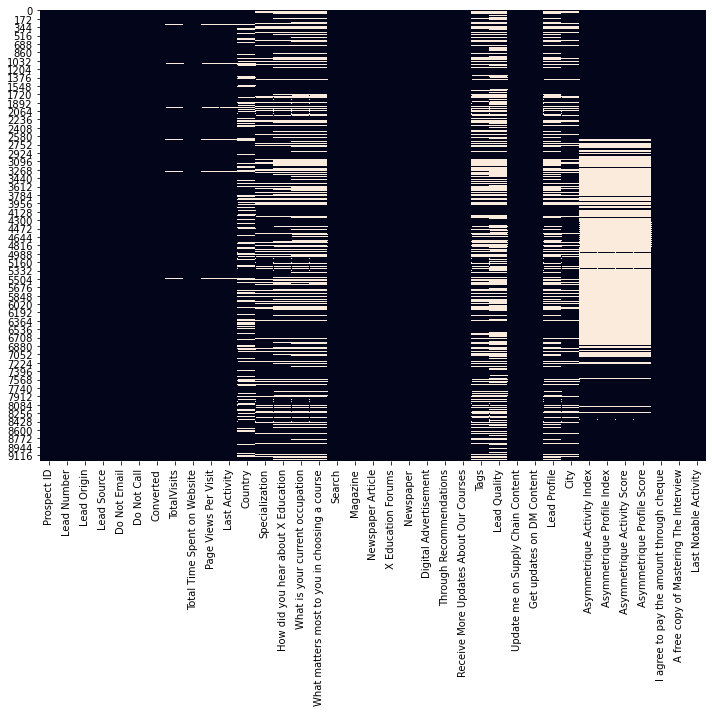

In [143]:
# Visualizing occurence of Null values in the columns based on rows
plt.figure(figsize=(10,10))
sns.heatmap(leads.isnull(), cbar=False)

plt.tight_layout()
plt.show()

In [144]:
# Identifying if any column exists with only null values
leads.isnull().all(axis=0).any()

False

In [145]:
# Dropping all columns with only 0 values
leads.loc[:, (leads != 0).any(axis=0)]
leads.shape

(9240, 37)

In [146]:
#Remove columns which has only one unique value
"""
Deleting the following columns as they have only one unique value 
and hence cannot be responsible in predicting a successful lead case
- Magazine
- Receive More Updates About Our Courses
- Update me on Supply Chain Content
- Update me on Supply Chain Content
- I agree to pay the amount through cheque
"""   
leads= leads.loc[:,leads.nunique()!=1]
leads.shape

(9240, 32)

In [147]:
# Deleting the columns 'Asymmetrique Activity Score' & 'Asymmetrique Profile Score' 
# as they will be represented by their corresponding index columns
leads = leads.drop('Asymmetrique Activity Score', axis=1)
leads = leads.drop('Asymmetrique Profile Score', axis=1)
leads.shape

(9240, 30)

In [148]:
# Deleting the columns 'Prospect ID' as it will not have any effect in the predicting model
leads = leads.drop('Prospect ID', axis=1)
#leads = leads.drop('Lead Number', axis=1)
leads.shape

(9240, 29)

In [149]:
# Deleting the columns 'What matters most to you in choosing a course' as it mostly has unique values and some null values.
leads = leads.drop('What matters most to you in choosing a course', axis=1)
leads.shape

(9240, 28)

In [150]:
# Deleting the columns 'How did you hear about X Education' as it mostly has null values or 'Select' values 
# that contribute to the 'Converted' percentage.
leads = leads.drop('How did you hear about X Education', axis=1)
leads.shape

(9240, 27)

In [151]:
# Removing rows where a particular column has high missing values
print(leads['Lead Source'].isnull().sum())

# removing rows where a particular column has high missing values because the column cannot be removed because of its importance
leads = leads[~pd.isnull(leads['Lead Source'])]
leads.shape

36


(9204, 27)

In [152]:
# Imputing with Median values for continuous variables as they have outliers
leads['TotalVisits'].replace(np.NaN, leads['TotalVisits'].median(), inplace =True)
leads['Page Views Per Visit'].replace(np.NaN, leads['Page Views Per Visit'].median(), inplace =True)

In [153]:
# Imputing with Mode values
print(leads['Country'].mode())

leads.loc[pd.isnull(leads['Country']), ['Country']] = 'India'

0    India
dtype: object


In [154]:
leads['Country'] = leads['Country'].apply(lambda x: 'India' if x=='India' else 'Outside India')
leads['Country'].value_counts()

India            8917
Outside India     287
Name: Country, dtype: int64

<AxesSubplot:xlabel='Converted', ylabel='Country'>

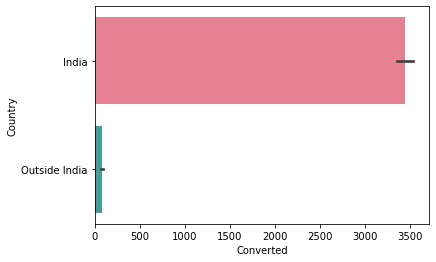

In [155]:
sns.barplot(y='Country', x='Converted', palette='husl', data=leads, estimator=np.sum)

###### Assigning An Unique Category to NULL/SELECT values

Instead of deleting columns with huge null value percentage(which results in loss of data), this strategy adds more information into the dataset and results in the change of variance.

**Creating a new category consisting on NULL/Select values for the field Lead Quality*

- 'Select' values in some columns` : 

There are some columns in dataset which have a level/value called 'Select'. This might have happened because these fields in the website might be non mandatory fields with drop downs options for the customer to choose from. Amongst the dropdown values, the default option is probably 'Select' and since these aren't  mandatory fields, many customer might have have chosen to leave it as the default value 'Select'.

In [156]:
print(leads['Lead Quality'].value_counts())
print("\n")
print(leads['Lead Quality'].isnull().sum())

Might be             1545
Not Sure             1090
High in Relevance     632
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64


4753


In [157]:
leads['Lead Quality'].fillna("Unknown", inplace = True)
leads['Lead Quality'].value_counts()

Unknown              4753
Might be             1545
Not Sure             1090
High in Relevance     632
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [158]:
# Creating a new category consisting on NULL/Select values for the field 'Asymmetrique Profile Index'
print(leads['Asymmetrique Profile Index'].value_counts())
print("\n")
print(leads['Asymmetrique Profile Index'].isnull().sum())

02.Medium    2771
01.High      2201
03.Low         31
Name: Asymmetrique Profile Index, dtype: int64


4201


In [159]:
leads['Asymmetrique Profile Index'].fillna("04.Unknown", inplace = True)
leads['Asymmetrique Profile Index'].value_counts()

04.Unknown    4201
02.Medium     2771
01.High       2201
03.Low          31
Name: Asymmetrique Profile Index, dtype: int64

In [160]:
# Creating a new category consisting on NULL/Select values for the field `Asymmetrique Activity Index`
print(leads['Asymmetrique Activity Index'].value_counts())
print("\n")
print(leads['Asymmetrique Activity Index'].isnull().sum())

02.Medium    3820
01.High       821
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64


4201


In [161]:
leads['Asymmetrique Activity Index'].fillna("04.Unknown", inplace = True)
leads['Asymmetrique Activity Index'].value_counts()

04.Unknown    4201
02.Medium     3820
01.High        821
03.Low         362
Name: Asymmetrique Activity Index, dtype: int64

In [162]:
# Creating a new category consisting on NULL/Select values for the field `City`
print(leads['City'].isnull().sum())

leads['City'].fillna("Unknown", inplace = True)
leads['City'].value_counts()

1420


Mumbai                         3220
Select                         2218
Unknown                        1420
Thane & Outskirts               751
Other Cities                    686
Other Cities of Maharashtra     456
Other Metro Cities              379
Tier II Cities                   74
Name: City, dtype: int64

In [163]:
leads['City'].replace('Select', 'Unknown', inplace =True)
leads['City'].value_counts()

Unknown                        3638
Mumbai                         3220
Thane & Outskirts               751
Other Cities                    686
Other Cities of Maharashtra     456
Other Metro Cities              379
Tier II Cities                   74
Name: City, dtype: int64

In [164]:
# Creating a new category consisting on NULL/Select values for the field `Last Activity`
print(leads['Last Activity'].value_counts())
print("\n")
print(leads['Last Activity'].isnull().sum())

Email Opened                    3432
SMS Sent                        2723
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    321
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      59
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64


101


In [165]:
leads['Last Activity'].fillna("Unknown", inplace = True)
leads['Last Activity'].value_counts()

Email Opened                    3432
SMS Sent                        2723
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    321
Email Link Clicked               267
Form Submitted on Website        116
Unknown                          101
Unreachable                       93
Unsubscribed                      59
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [166]:
# Creating a new category consisting on NULL/Select values for the field `Lead Profile`
print(leads['Lead Profile'].value_counts())
print("\n")
print(leads['Lead Profile'].isnull().sum())

Select                         4115
Potential Lead                 1608
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64


2709


In [167]:
leads['Lead Profile'].fillna("Unknown", inplace = True)
leads['Lead Profile'].value_counts()

Select                         4115
Unknown                        2709
Potential Lead                 1608
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [169]:
leads['Lead Profile'].replace('Select', 'Unknown', inplace =True)
leads['Lead Profile'].value_counts()

Unknown                        6824
Potential Lead                 1608
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [170]:
# Creating a new category consisting on NULL/Select values for the field `What is your current occupation`
print(leads['What is your current occupation'].value_counts())
print("\n")
print(leads['What is your current occupation'].isnull().sum())

Unemployed              5567
Working Professional     704
Student                  209
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64


2690


In [171]:
leads['What is your current occupation'].fillna("Unknown", inplace = True)
leads['What is your current occupation'].value_counts()

Unemployed              5567
Unknown                 2690
Working Professional     704
Student                  209
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [172]:
# Creating a new category consisting on NULL/Select values for the field `Specialization`
print(leads['Specialization'].value_counts())
print("\n")
print(leads['Specialization'].isnull().sum())

Select                               1914
Finance Management                    973
Human Resource Management             847
Marketing Management                  837
Operations Management                 502
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 158
Hospitality Management                114
E-COMMERCE                            111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64


1438


In [174]:
leads['Specialization'].replace('Select', 'Unknown', inplace =True)
leads['Specialization'].value_counts()

Unknown                              1914
Finance Management                    973
Human Resource Management             847
Marketing Management                  837
Operations Management                 502
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 158
Hospitality Management                114
E-COMMERCE                            111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [175]:
leads['Specialization'].fillna("Unknown", inplace = True)
leads['Specialization'].value_counts()

Unknown                              3352
Finance Management                    973
Human Resource Management             847
Marketing Management                  837
Operations Management                 502
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 158
Hospitality Management                114
E-COMMERCE                            111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [176]:
# Creating a new category consisting on NULL/Select values for the field `Tags`
print(leads['Tags'].value_counts())
print("\n")
print(leads['Tags'].isnull().sum())

Will revert after reading the email                  2052
Ringing                                              1200
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          174
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    26
in touch with EINS                                     12
Lost to Others

In [177]:
leads['Tags'].fillna("Unknown", inplace = True)
leads['Tags'].value_counts()

Unknown                                              3342
Will revert after reading the email                  2052
Ringing                                              1200
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          174
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    26
in touch with 

In [178]:
# Reinspecting Null Values
# Checking for total count and percentage of null values in all columns of the dataframe.

total = pd.DataFrame(leads.isnull().sum().sort_values(ascending=False), columns=['Total'])

percentage = pd.DataFrame(round(100*(leads.isnull().sum()/leads.shape[0]),2).sort_values(ascending=False),columns=['Percentage'])

pd.concat([total, percentage], axis = 1).head()

,Total,Percentage
Lead Number,0,0.0
Newspaper Article,0,0.0
A free copy of Mastering The Interview,0,0.0
Asymmetrique Profile Index,0,0.0
Asymmetrique Activity Index,0,0.0


### C) Checking for Outliers

In [179]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
leads.describe(percentiles=[.25,.5,.75,.90,.95,.99]).T

,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
Lead Number,9204.0,617194.608648,23418.830233,579533.0,596484.5,615479.0,637409.25,650513.1,655405.85,659599.46,660737.0
Converted,9204.0,0.383746,0.486324,0.0,0.0,0.0,1.00,1.0,1.00,1.00,1.0
TotalVisits,9204.0,3.449587,4.824662,0.0,1.0,3.0,5.00,7.0,10.00,17.00,251.0
Total Time Spent on Website,9204.0,489.005541,547.980340,0.0,14.0,250.0,938.00,1380.0,1562.00,1839.97,2272.0
Page Views Per Visit,9204.0,2.364923,2.145999,0.0,1.0,2.0,3.00,5.0,6.00,9.00,55.0


['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']


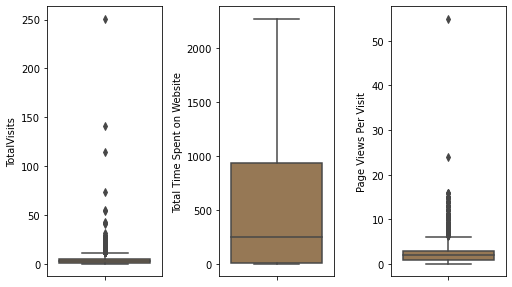

In [180]:
numeric_variables = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
print(numeric_variables)

#Function to plot the distribution plot of the numeric variable list
def boxplot(var_list):
    plt.figure(figsize=(12,8))
    for var in var_list:
        plt.subplot(2,5,var_list.index(var)+1)
        #plt.boxplot(country[var])
        sns.boxplot(y=var,palette='cubehelix', data=leads)
    
    # Automatically adjust subplot params so that the subplotS fits in to the figure area.
    plt.tight_layout()
    
    # display the plot
    plt.show()
    
boxplot(numeric_variables)    

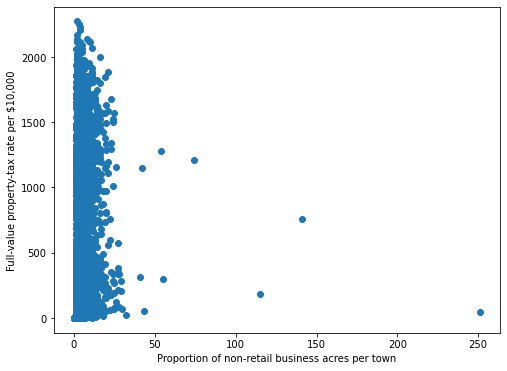

In [181]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(leads['TotalVisits'], leads['Total Time Spent on Website'])
ax.set_xlabel('Proportion of non-retail business acres per town')
ax.set_ylabel('Full-value property-tax rate per $10,000')
plt.show()

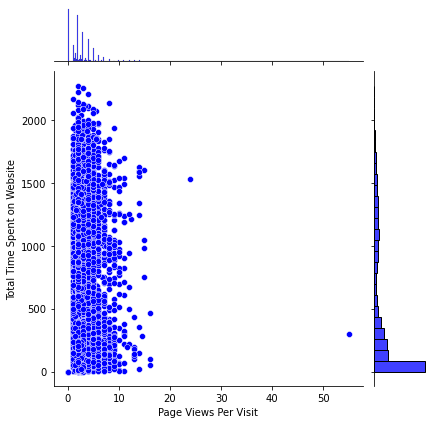

In [182]:
sns.jointplot(leads['Page Views Per Visit'],leads['Total Time Spent on Website'], color="b")
plt.show()

###### Removing outlier values based on the Interquartile distance for some of the continuous variable

In [183]:
print(leads.shape)

Q1 = leads['TotalVisits'].quantile(0.25)
Q3 = leads['TotalVisits'].quantile(0.75)
IQR = Q3 - Q1
leads=leads.loc[(leads['TotalVisits'] >= Q1 - 1.5*IQR) & (leads['TotalVisits'] <= Q3 + 1.4*IQR)]

Q1 = leads['Page Views Per Visit'].quantile(0.25)
Q3 = leads['Page Views Per Visit'].quantile(0.75)
IQR = Q3 - Q1
leads=leads.loc[(leads['Page Views Per Visit'] >= Q1 - 1.5*IQR) & (leads['Page Views Per Visit'] <= Q3 + 1.5*IQR)]

leads.shape

(9204, 27)


(8575, 27)

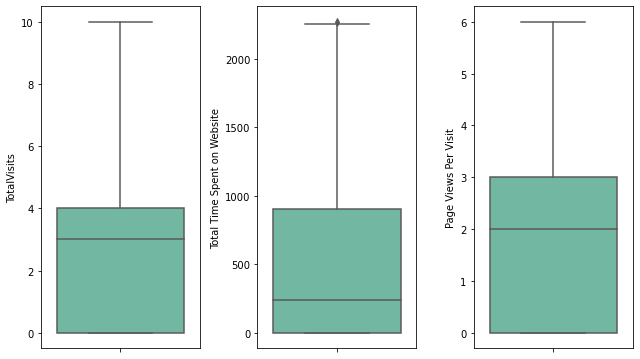

In [184]:
#Function to plot the distribution plot of the numeric variable list
def boxplot(var_list):
    plt.figure(figsize=(15,10))
    for var in var_list:
        plt.subplot(2,5,var_list.index(var)+1)
        sns.boxplot(y=var,palette='BuGn_r', data=leads)
    
    # Automatically adjust subplot params so that the subplotS fits in to the figure area.
    plt.tight_layout()
    
    # display the plot
    plt.show()
    
boxplot(numeric_variables)    

### D)  Converting some binary variables (Yes/No) to 0/1

In [185]:
# List of variables to map
varlist =  ['Search','Do Not Email', 'Do Not Call', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview']

In [186]:
print(leads.shape)
print(leads['Search'].value_counts())
print(leads['Do Not Email'].value_counts())
print(leads['Do Not Call'].value_counts())
print(leads['Newspaper Article'].value_counts())
print(leads['X Education Forums'].value_counts())
print(leads['Newspaper'].value_counts())
print(leads['Digital Advertisement'].value_counts())
print(leads['Through Recommendations'].value_counts())
print(leads['A free copy of Mastering The Interview'].value_counts())

(8575, 27)
No     8569
Yes       6
Name: Search, dtype: int64
No     7920
Yes     655
Name: Do Not Email, dtype: int64
No     8573
Yes       2
Name: Do Not Call, dtype: int64
No    8575
Name: Newspaper Article, dtype: int64
No    8575
Name: X Education Forums, dtype: int64
No     8574
Yes       1
Name: Newspaper, dtype: int64
No     8573
Yes       2
Name: Digital Advertisement, dtype: int64
No     8572
Yes       3
Name: Through Recommendations, dtype: int64
No     6040
Yes    2535
Name: A free copy of Mastering The Interview, dtype: int64


In [187]:
# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads[varlist] = leads[varlist].apply(binary_map)

In [188]:
print(leads['Search'].value_counts())
print(leads['Do Not Email'].value_counts())
print(leads['Do Not Call'].value_counts())
print(leads['Newspaper Article'].value_counts())
print(leads['X Education Forums'].value_counts())
print(leads['Newspaper'].value_counts())
print(leads['Digital Advertisement'].value_counts())
print(leads['Through Recommendations'].value_counts())
print(leads['A free copy of Mastering The Interview'].value_counts())

0    8569
1       6
Name: Search, dtype: int64
0    7920
1     655
Name: Do Not Email, dtype: int64
0    8573
1       2
Name: Do Not Call, dtype: int64
0    8575
Name: Newspaper Article, dtype: int64
0    8575
Name: X Education Forums, dtype: int64
0    8574
1       1
Name: Newspaper, dtype: int64
0    8573
1       2
Name: Digital Advertisement, dtype: int64
0    8572
1       3
Name: Through Recommendations, dtype: int64
0    6040
1    2535
Name: A free copy of Mastering The Interview, dtype: int64


### E) For categorical variables with multiple levels, creating dummy features (one-hot encoded)

###### Knowledge Byte
The get_dummies function is used to convert categorical variables into dummy or indicator variables.
- A dummy or indicator variable can have a value of 0 or 1.
- It takes a data frame, series, or list and then, it converts each unique element present in the object to a column heading.
- The function iterates over the object that is passed and checks if the element at the particular index matches the column heading.
- If it does, it encodes it as a 1, otherwise, it assigns it a 0.

**pandas.get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)**

    data: Refers to a data frame, series, or list.
    prefix: String to append column names of the data frame that is returned. It is None by default.
    prefix_sep:	The separator or delimiter to be used if a prefix is added. It is _ by default.
    dummy_na:	Adding a column to represent NAN values. It is False by default.
    columns:	Column names in the data frame to be encoded. It is None by default.
    sparse:	Whether a SparseArray should back the dummy-encoded columns. It is False by default.
    drop_first:	To remove the first column. It is False by default.
    dtype:	Data type for the new column.

In [189]:
print(leads.shape)

# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(leads[['Country', 'Lead Source','Lead Origin','Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
leads = pd.concat([leads, dummy1], axis=1)
print(leads.shape)

leads.head()

(8575, 27)
(8575, 66)


,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,1,0,0,0,0,0,0,0
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,1,0,0,0,0,0,0,0
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,1,0,0,0,0,0,0,0


In [190]:
# Creating dummy variables for the remaining categorical variables and 
# dropping the level called 'Unknown' which represents null/select values.

# Creating dummy variables for the variable 'Lead Quality'
ml = pd.get_dummies(leads['Lead Quality'], prefix='Lead Quality')
# Dropping the level called 'Unknown' which represents null/select values
ml1 = ml.drop(['Lead Quality_Unknown'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,ml1], axis=1)

#--------------------------------------------------------------------------------------
# Creating dummy variables for the variable 'Asymmetrique Profile Index'
ml = pd.get_dummies(leads['Asymmetrique Profile Index'], prefix='Asymmetrique Profile Index')
# Dropping the level called 'Unknown' which represents null/select values
ml1 = ml.drop(['Asymmetrique Profile Index_04.Unknown'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,ml1], axis=1)

#--------------------------------------------------------------------------------------
# Creating dummy variables for the variable 'Asymmetrique Activity Index'
ml = pd.get_dummies(leads['Asymmetrique Activity Index'], prefix='Asymmetrique Activity Index')
# Dropping the level called 'Unknown' which represents null/select values
ml1 = ml.drop(['Asymmetrique Activity Index_04.Unknown'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,ml1], axis=1)

#--------------------------------------------------------------------------------------
# Creating dummy variables for the variable 'Tags'
ml = pd.get_dummies(leads['Tags'], prefix='Tags')
# Dropping the level called 'Unknown' which represents null/select values
ml1 = ml.drop(['Tags_Unknown'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,ml1], axis=1)

#--------------------------------------------------------------------------------------
# Creating dummy variables for the variable 'Lead Profile'
ml = pd.get_dummies(leads['Lead Profile'], prefix='Lead Profile')
# Dropping the level called 'Unknown' which represents null/select values
ml1 = ml.drop(['Lead Profile_Unknown'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,ml1], axis=1)

#--------------------------------------------------------------------------------------
# Creating dummy variables for the variable 'What is your current occupation'
ml = pd.get_dummies(leads['What is your current occupation'], prefix='What is your current occupation')
# Dropping the level called 'Unknown' which represents null/select values
ml1 = ml.drop(['What is your current occupation_Unknown'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,ml1], axis=1)

#--------------------------------------------------------------------------------------
# Creating dummy variables for the variable 'Specialization'
ml = pd.get_dummies(leads['Specialization'], prefix='Specialization')
# Dropping the level called 'Unknown' which represents null/select values
ml1 = ml.drop(['Specialization_Unknown'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,ml1], axis=1)

#--------------------------------------------------------------------------------------
# Creating dummy variables for the variable 'City'
ml = pd.get_dummies(leads['City'], prefix='City')
# Dropping the level called 'Unknown' which represents null/select values
ml1 = ml.drop(['City_Unknown'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,ml1], axis=1)

#--------------------------------------------------------------------------------------
# Creating dummy variables for the variable 'Last Activity'
ml = pd.get_dummies(leads['Last Activity'], prefix='Last Activity')
# Dropping the level called 'Unknown' which represents null/select values
ml1 = ml.drop(['Last Activity_Unknown'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,ml1], axis=1)

#--------------------------------------------------------------------------------------
leads.shape

(8575, 155)

In [191]:
leads.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,0,1,0,0,0,0,0,0
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,0,0,0,0,1,0,0,0
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,0,0,0,0,0,0,0,0


In [192]:
# We have created dummies for the below variables, so we can drop them
leads = leads.drop(['Lead Quality','Asymmetrique Profile Index','Asymmetrique Activity Index','Tags','Lead Profile',
                    'Lead Origin','What is your current occupation', 'Specialization', 'City','Last Activity', 'Country', 
                    'Lead Source','Last Notable Activity'], 1)
print(leads.shape)

leads.head()

(8575, 142)


,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,...,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
0,660737,0,0,0,0.0,0,0.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,660728,0,0,0,5.0,674,2.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,660727,0,0,1,2.0,1532,2.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,660719,0,0,0,1.0,305,1.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,660681,0,0,1,2.0,1428,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [193]:
# Ensuring there are no categorical columns left in the dataframe
cols = leads.columns
num_cols = leads._get_numeric_data().columns
list(set(cols) - set(num_cols))

[]

In [194]:
# Creating a copy of this origial variable in case if needed later on
original_leads = leads.copy()
print(original_leads.shape)
print(leads.shape)

(8575, 142)
(8575, 142)


## Task4: Visualizations

<AxesSubplot:>

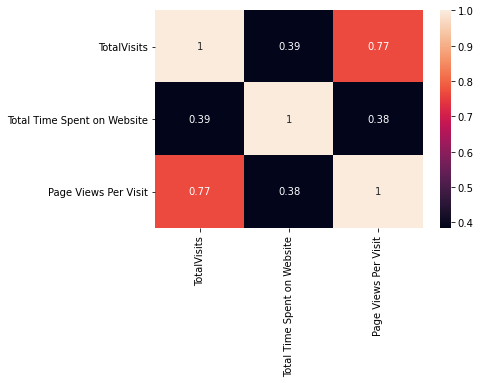

In [195]:
# Correlation between variables
sns.heatmap(leads.iloc[:,4:7].corr(),annot = True)

###### Insights: Good correlation between 'TotalVisits' and 'Page Views Per Visit'

### Task5: Test-Train Split

In [196]:
from sklearn.model_selection import train_test_split

In [200]:
# Putting feature variable to X
X = leads.drop(['Converted','Lead Number'], axis=1)

# Putting response variable to y
y = leads['Converted']

print(X.shape)
print(y.shape)
X.head()

(8575, 140)
(8575,)


,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [201]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [202]:
X_train.shape, y_train.shape

((6002, 140), (6002,))

In [203]:
X_test.shape, y_test.shape

((2573, 140), (2573,))

### Task6: Feature Scaling

In [95]:
from sklearn.preprocessing import StandardScaler

In [204]:
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
8529,0,0,0.969969,-0.864724,1.785283,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
7331,0,0,0.102087,-0.215257,0.562949,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7688,0,0,0.102087,1.523992,0.562949,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
92,0,0,0.536028,-0.686762,1.174116,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4908,0,0,-1.199737,-0.872062,-1.270553,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [205]:
X_train.describe()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
count,6002.000000,6002.0,6.002000e+03,6.002000e+03,6.002000e+03,6002.000000,6002.0,6002.0,6002.000000,6002.000000,...,6002.000000,6002.000000,6002.000000,6002.000000,6002.0,6002.000000,6002.000000,6002.000000,6002.000000,6002.000000
mean,0.076308,0.0,6.130088e-17,1.427826e-16,1.538996e-17,0.001000,0.0,0.0,0.000167,0.000333,...,0.014162,0.002499,0.111629,0.063146,0.0,0.298567,0.010163,0.007331,0.000333,0.000167
std,0.265512,0.0,1.000083e+00,1.000083e+00,1.000083e+00,0.031604,0.0,0.0,0.012908,0.018253,...,0.118168,0.049933,0.314936,0.243245,0.0,0.457668,0.100308,0.085313,0.018253,0.012908
min,0.000000,0.0,-1.199737e+00,-8.720622e-01,-1.270553e+00,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.0,-7.657957e-01,-8.683929e-01,-6.593854e-01,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.0,1.020868e-01,-4.381673e-01,-4.821826e-02,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.0,5.360281e-01,7.846274e-01,5.629489e-01,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,0.0,3.139676e+00,3.296264e+00,2.396450e+00,1.000000,0.0,0.0,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [206]:
# Checking the Lead Conversion Rate
converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
converted

38.04081632653061

###### Insight: We have almost 38% lead conversion rate

## Task7: Model Building

##### 1) Logistic Regression Model

In [207]:
import statsmodels.api as sm

In [208]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6002
Model:                            GLM   Df Residuals:                     5872
Model Family:                Binomial   Df Model:                          129
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 26 Aug 2023   Deviance:                       39697.
Time:                        13:59:30   Pearson chi2:                 1.94e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                  -1.646e+15   1.08e+08  -1.52e+07      0.000   -1.65e+15   -1.65e+15
Do Not Email                                           -2.529e+14   4.66e+06  -5.43e+07      0.000   -2.53e+14   -2.53e+14
Do Not Call                                               24.7621   6.77e-07   3.66e+07      0.000      24.762      24.762
TotalVisits                                             7.543e+13   1.51e+06   4.99e+07      0.000    7.54e+13    7.54e+13
Total Time Spent on Website                             1.369e+14   1.07e+06   1.28e+08      0.000    1.37e+14    1.37e+14
Page Views Per Visit                                   -9.641e+13   1.64e+06  -5.89e+07      0.000   -9.64e+13   -9.64e+13
Search                                                  1.091e+14    2.9e+07   3.76e+06      0.000    1.09e+14    1.09e+14
Newspaper Article                                         69.1927   1.45e-06   4.78e+07      0.000      69.193      69.193
X Education Forums                                       -13.5219   1.91e-06  -7.09e+06      0.000     -13.522     -13.522
Newspaper                                              -3.606e+15   6.76e+07  -5.33e+07      0.000   -3.61e+15   -3.61e+15
Digital Advertisement                                   6.835e+12   4.85e+07   1.41e+05      0.000    6.84e+12    6.84e+12
Through Recommendations                                -1.285e+14      5e+07  -2.57e+06      0.000   -1.29e+14   -1.29e+14
A free copy of Mastering The Interview                  2.141e+13   2.94e+06   7.29e+06      0.000    2.14e+13    2.14e+13
Country_Outside India                                   6.444e+13   4.98e+06   1.29e+07      0.000    6.44e+13    6.44e+13
Lead Source_Direct Traffic                              3.897e+15   7.95e+07    4.9e+07      0.000     3.9e+15     3.9e+15
Lead Source_Facebook                                    1.738e+15   4.01e+07   4.33e+07      0.000    1.74e+15    1.74e+15
Lead Source_Google                                      3.931e+15   7.95e+07   4.94e+07      0.000    3.93e+15    3.93e+15
Lead Source_Live Chat                                   1.454e+15   6.31e+07    2.3e+07      0.000    1.45e+15    1.45e+15
Lead Source_NC_EDM                                      8.695e+15   1.04e+08   8.35e+07      0.000     8.7e+15     8.7e+15
Lead Source_Olark Chat                                  4.014e+15   7.94e+07   5.06e+07      0.000    4.01e+15    4.01e+15
Lead Source_Organic Search                              3.818e+15   7.96e+07    4.8e+07      0.000    3.82e+15    3.82e+15
Lead Source_Pay per Click Ads                           9.495e+14   1.04e+08   9.11e+06      0.000    9.49e+14    9.49e+14
Lead Sou

##### 2) Feature Selection Using RFE

Recursive Feature Elimination is a feature selection method to identify a dataset’s key features. The process involves developing a model with the remaining features after repeatedly removing the least significant parts until the desired number of features is obtained. Although RFE can be used with any supervised learning method, Support Vector Machines (SVM) are the most popular pairing.

Recursive Feature Elimination algorithm works in the following steps:
1. Rank the importance of all features using the chosen RFE machine learning algorithm.
2. Eliminate the least important feature.
3. Build a model using the remaining features.
4. Repeat steps 1-3 until the desired number of features is reached.

Articles to learn more:
- https://www.analyticsvidhya.com/blog/2023/05/recursive-feature-elimination/
- https://www.upgrad.com/blog/recursive-feature-elimination-what-it-is-and-why-it-matters/

In [217]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [220]:
from sklearn.feature_selection import RFE

# Running RFE with 20 variables as output
rfe = RFE(logreg, n_features_to_select=20, step=1)            
rfe

RFE(estimator=LogisticRegression(), n_features_to_select=20)

In [221]:
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=20)

In [222]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True,  True,
       False,  True,  True, False, False,  True, False,  True, False,
        True, False,  True, False,  True, False, False, False, False,
        True, False,  True,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [223]:
rfe.ranking_

array([  8, 121,  68,  12,  54,  23, 116, 115,  92,  76, 103,  94,  72,
        52,  57,  93, 108,  19,  11,  67, 110, 120,  36,  62, 112, 114,
         1,  99,  73,  87, 106,  77, 119,  83,  10,  53,  29,  21,  78,
        90, 105,  91,  42,   2,   6,  98, 118,  16,  69,  31, 104,  55,
        74,  32,  40,   1,  60,  82,  81,  64,  63,   1,   1,  17,   1,
         1,   4,  41,   1,  49,   1,  18,   1,  30,   1,  25,   1,  37,
         9,  39,  24,   1,  66,   1,   1,   1,   1,   1,  56,  15,  27,
        26,  50,  95,  13,  14,   3,   1,   1,  80,  79,  51, 107, 101,
        59,  84, 100,  61,  47,  75,  48,  85, 113,  89,  46,  33,  22,
        71,  65,  97,  38,  70,  20,  58,  45,  44,  34,  86, 109,  96,
        35,   5,  28,  43, 117,   1,  88,   7, 102, 111])

In [224]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 8),
 ('Do Not Call', False, 121),
 ('TotalVisits', False, 68),
 ('Total Time Spent on Website', False, 12),
 ('Page Views Per Visit', False, 54),
 ('Search', False, 23),
 ('Newspaper Article', False, 116),
 ('X Education Forums', False, 115),
 ('Newspaper', False, 92),
 ('Digital Advertisement', False, 76),
 ('Through Recommendations', False, 103),
 ('A free copy of Mastering The Interview', False, 94),
 ('Country_Outside India', False, 72),
 ('Lead Source_Direct Traffic', False, 52),
 ('Lead Source_Facebook', False, 57),
 ('Lead Source_Google', False, 93),
 ('Lead Source_Live Chat', False, 108),
 ('Lead Source_NC_EDM', False, 19),
 ('Lead Source_Olark Chat', False, 11),
 ('Lead Source_Organic Search', False, 67),
 ('Lead Source_Pay per Click Ads', False, 110),
 ('Lead Source_Press_Release', False, 120),
 ('Lead Source_Reference', False, 36),
 ('Lead Source_Referral Sites', False, 62),
 ('Lead Source_Social Media', False, 112),
 ('Lead Source_WeLearn', False, 1

In [227]:
# Taking 'True' columns
col_relevant = X_train.columns[rfe.support_]
col_relevant

Index(['Lead Source_Welingak Website', 'Lead Quality_Worst',
       'Asymmetrique Activity Index_03.Low', 'Tags_Already a student',
       'Tags_Closed by Horizzon', 'Tags_Diploma holder (Not Eligible)',
       'Tags_Interested  in full time MBA', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_number not provided', 'Tags_opp hangup', 'Tags_switched off',
       'Tags_wrong number given', 'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Activity_SMS Sent'],
      dtype='object')

In [226]:
# Checking 'False' columns 
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement',
       ...
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Booth in Tradeshow'],
      dtype='object', length=120)

In [228]:
# Assessing the model with StatsModels
X_train_sm = sm.add_constant(X_train[col_relevant])

logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6002
Model:                            GLM   Df Residuals:                     5981
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1264.7
Date:                Sat, 26 Aug 2023   Deviance:                       2529.4
Time:                        14:12:36   Pearson chi2:                 8.56e+03
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.4929      0.090    -27.836      0.000      -2.668      -2.317
Lead Source_Welingak Website                             3.2281      0.731      4.414      0.000       1.795       4.662
Lead Quality_Worst                                      -2.5504      0.761     -3.354      0.001      -4.041      -1.060
Asymmetrique Activity Index_03.Low                      -2.4592      0.358     -6.869      0.000      -3.161      -1.758
Tags_Already a student                                  -3.8785      0.726     -5.344      0.000      -5.301      -2.456
Tags_Closed by Horizzon                                  5.1421      0.722      7.120      0.000       3.727       6.558
Tags_Diploma holder (Not Eligible)                     -24.1871   2.82e+04     -0.001      0.999   -5.52e+04    5.52e+04
Tags_Interested  in full time MBA                       -3.0545      0.742     -4.117      0.000      -4.509      -1.600
Tags_Interested in other courses                        -3.0288      0.330     -9.183      0.000      -3.675      -2.382
Tags_Lost to EINS                                        6.3792      0.831      7.677      0.000       4.751       8.008
Tags_Not doing further education                        -3.7904      1.032     -3.674      0.000      -5.813      -1.768
Tags_Ringing                                            -4.2659      0.249    -17.107      0.000      -4.755      -3.777
Tags_Will revert after reading the email                 3.5963      0.194     18.561      0.000       3.217       3.976
Tags_invalid number                                    -25.7192    2.7e+04     -0.001      0.999    -5.3e+04    5.29e+04
Tags_number not provided                               -25.9733    4.5e+04     -0.001      1.000   -8.82e+04    8.82e+04
Tags_opp hangup                                         -3.5152      1.063     -3.308      0.001      -5.598      -1.433
Tags_switched off                                       -5.1620      0.724     -7.126      0.000      -6.582      -3.742
Tags_wrong number given                                -26.1206   3.49e+04     -0.001      0.999   -6.84e+04    6.84e+04
What is your current occupation_Unemployed               2.0649      0.119     17.357      0.000       1.832       2.298
What is your current occupation_Working Professional     2.1458      0.364      5.903      0.000       1.433       2.858
Last Activity_SMS Sent                                   2.0390      0.112     18.174      0.000       1.819       2.259
========================================================================================================================
"""

###### Insight: 
High p-value for following variables-
1. Tags_wrong number given
2. Tags_number not provided
3. Tags_invalid number
4. Tags_Diploma holder (Not Eligible)

##### 3) Checking the results

In [229]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

8529    0.065692
7331    0.009069
7688    0.833555
92      0.076360
4908    0.076360
451     0.009069
4945    0.009069
2844    0.994975
4355    0.076360
7251    0.001051
dtype: float64

In [230]:
# reshaping the numpy array containing predicted values
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.06569164, 0.00906869, 0.83355546, 0.07635965, 0.07635965,
       0.00906869, 0.00906869, 0.99497496, 0.07635965, 0.00105118])

In [231]:
# Creating a dataframe with the actual 'Converted' values and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})

y_train_pred_final['LeadID'] = y_train.index

y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,0,0.065692,8529
1,0,0.009069,7331
2,1,0.833555,7688
3,0,0.076360,92
4,0,0.076360,4908


In [232]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,0,0.065692,8529,0
1,0,0.009069,7331,0
2,1,0.833555,7688,1
3,0,0.076360,92,0
4,0,0.076360,4908,0


In [235]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3647,   89],
       [ 409, 1857]], dtype=int64)

<AxesSubplot:>

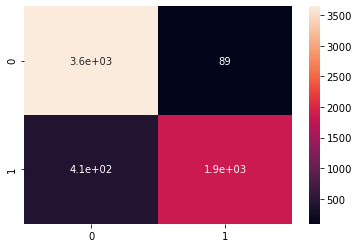

In [237]:
sns.heatmap(confusion, annot=True)

In [238]:
# Overall accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9170276574475175


In [240]:
# Classification Report
print(classification_report(y_train_pred_final.Converted, y_train_pred_final.predicted))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      3736
           1       0.95      0.82      0.88      2266

    accuracy                           0.92      6002
   macro avg       0.93      0.90      0.91      6002
weighted avg       0.92      0.92      0.92      6002



###### VIF
- VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable.
- VIF score of an independent variable represents how well the variable is explained by other independent variables.

R^2 value is determined to find out how well an independent variable is described by the other independent variables. A high value of R^2 means that the variable is highly correlated with the other variables. This is captured by the VIF. So, the closer the R^2 value to 1, the higher the value of VIF and the higher the multicollinearity with the particular independent variable.


A rule of thumb for interpreting the variance inflation factor:
- 1 = not correlated.
- Between 1 and 5 = moderately correlated.
- Greater than 5 = highly correlated.


Note: Although correlation matrix and scatter plots can also be used to find multicollinearity, their findings only show the bivariate relationship between the independent variables. VIF is preferred as it can show the correlation of a variable with a group of other variables.

How to interpret:

<img align="left" src="./Image1.png"    style=" width:800px; padding: 10px;  " /> 

In [241]:
# Checking VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [243]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col_relevant].columns
vif['VIF'] = [variance_inflation_factor(X_train[col_relevant].values, i) for i in range(X_train[col_relevant].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Tags_Closed by Horizzon,1.30
9,Tags_Not doing further education,1.27
15,Tags_switched off,1.20
5,Tags_Diploma holder (Not Eligible),1.12
6,Tags_Interested in full time MBA,1.12
2,Asymmetrique Activity Index_03.Low,1.11
0,Lead Source_Welingak Website,1.09
12,Tags_invalid number,1.08
8,Tags_Lost to EINS,1.07
16,Tags_wrong number given,1.04


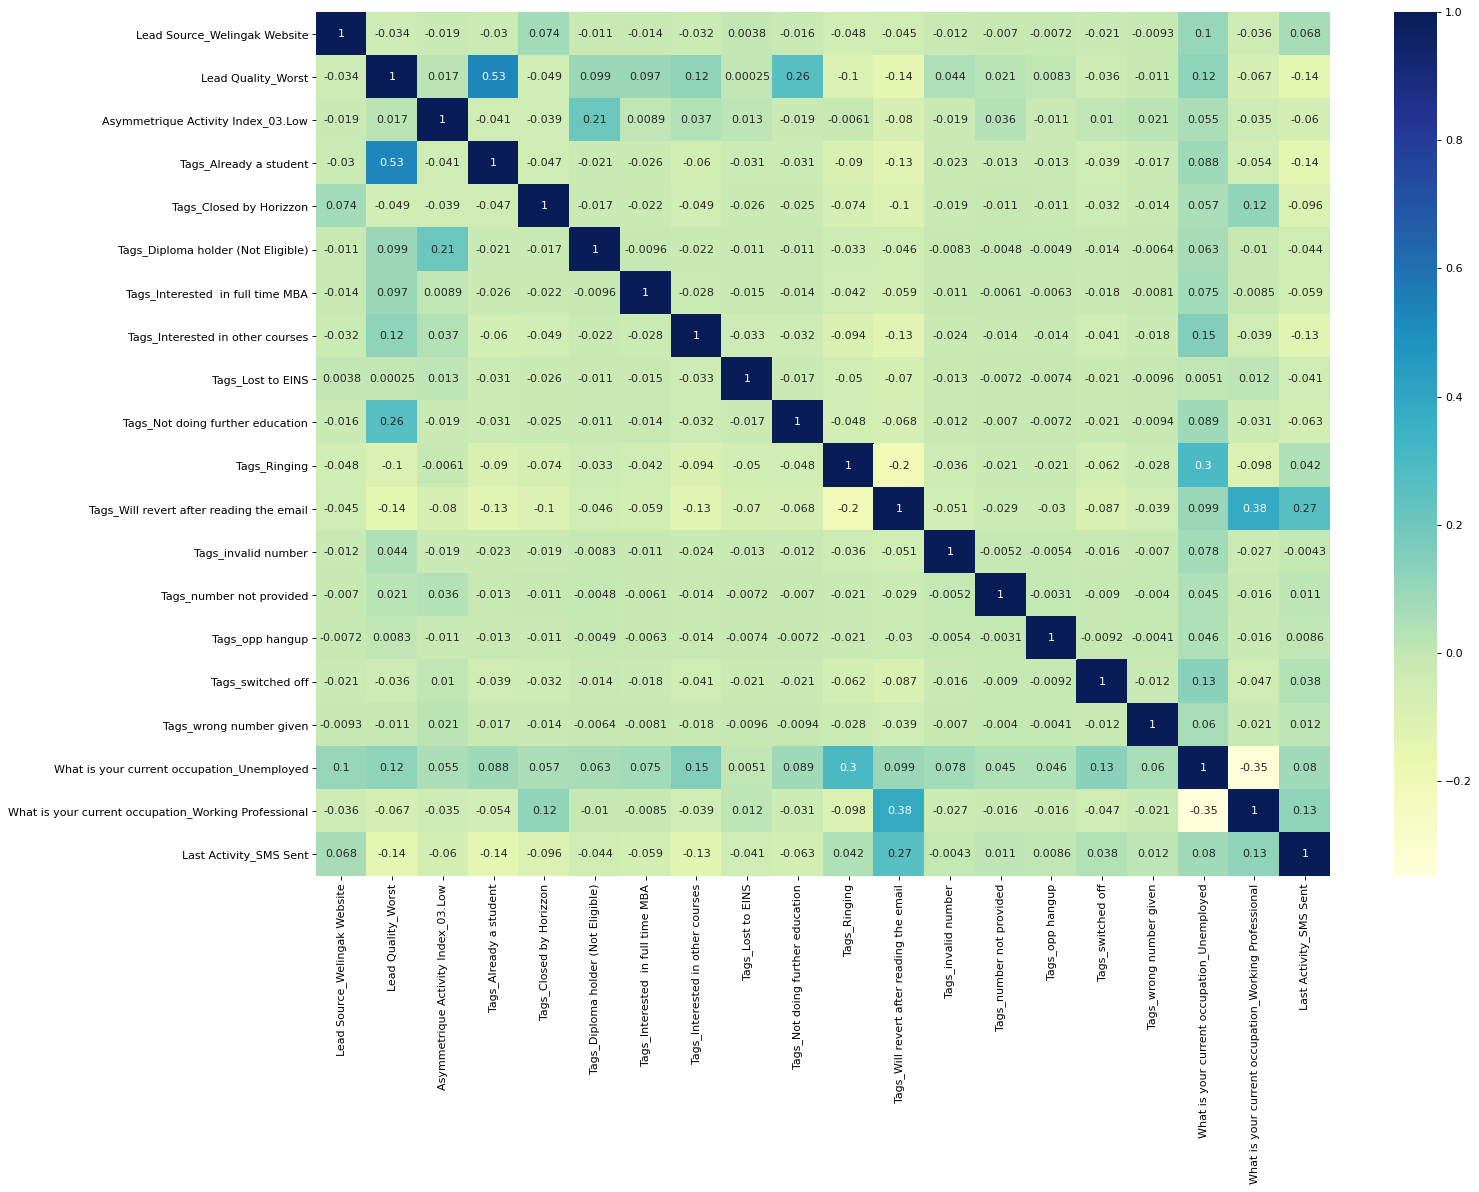

In [244]:
# Checking the correlation among the features

# Slightly altered the figure size to make it more horizontal.
plt.figure(figsize=(20,15), dpi=80, facecolor='w', edgecolor='k', frameon='True')

cor = X_train[col_relevant].corr()
sns.heatmap(cor, annot=True, cmap="YlGnBu")

plt.tight_layout()
plt.show()

###### Insight: There is not much multicollinearity present in our model among the selected features as per their VIF values and correlation heat map.

##### 4) Re-running the model

Considering high p-value and VIF score to remove some variables:
1. Tags_wrong number given
2. Tags_number not provided
3. Tags_invalid number
4. Tags_Diploma holder (Not Eligible)

Note: We should remove them one by one and continue checking the model accuracy but in this case, I am deleting them at once. 

In [247]:
col = col_relevant.drop('Tags_wrong number given', 1)
col = col.drop('Tags_number not provided', 1)
col = col.drop('Tags_invalid number', 1)
col = col.drop('Tags_Diploma holder (Not Eligible)', 1)

print(col_relevant)
print("\n")
print(col)

Index(['Lead Source_Welingak Website', 'Lead Quality_Worst',
       'Asymmetrique Activity Index_03.Low', 'Tags_Already a student',
       'Tags_Closed by Horizzon', 'Tags_Diploma holder (Not Eligible)',
       'Tags_Interested  in full time MBA', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_number not provided', 'Tags_opp hangup', 'Tags_switched off',
       'Tags_wrong number given', 'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Activity_SMS Sent'],
      dtype='object')
Index(['Lead Source_Welingak Website', 'Lead Quality_Worst',
       'Asymmetrique Activity Index_03.Low', 'Tags_Already a student',
       'Tags_Closed by Horizzon', 'Tags_Interested  in full time MBA',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Not doin

In [248]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6002
Model:                            GLM   Df Residuals:                     5985
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1342.4
Date:                Sat, 26 Aug 2023   Deviance:                       2684.8
Time:                        14:46:18   Pearson chi2:                 8.52e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.4751      0.088    -28.144      0.000      -2.647      -2.303
Lead Source_Welingak Website                             3.6135      0.730      4.949      0.000       2.182       5.044
Lead Quality_Worst                                      -3.1794      0.670     -4.742      0.000      -4.494      -1.865
Asymmetrique Activity Index_03.Low                      -2.3401      0.354     -6.605      0.000      -3.035      -1.646
Tags_Already a student                                  -3.4492      0.722     -4.776      0.000      -4.865      -2.034
Tags_Closed by Horizzon                                  5.4435      0.720      7.559      0.000       4.032       6.855
Tags_Interested  in full time MBA                       -2.6565      0.740     -3.591      0.000      -4.106      -1.207
Tags_Interested in other courses                        -2.6347      0.327     -8.060      0.000      -3.275      -1.994
Tags_Lost to EINS                                        6.7102      0.862      7.786      0.000       5.021       8.399
Tags_Not doing further education                        -3.3472      1.030     -3.250      0.001      -5.366      -1.329
Tags_Ringing                                            -3.8360      0.244    -15.709      0.000      -4.315      -3.357
Tags_Will revert after reading the email                 3.8695      0.190     20.331      0.000       3.497       4.243
Tags_opp hangup                                         -3.0789      1.061     -2.903      0.004      -5.158      -1.000
Tags_switched off                                       -4.7274      0.722     -6.544      0.000      -6.143      -3.311
What is your current occupation_Unemployed               1.6711      0.112     14.926      0.000       1.452       1.891
What is your current occupation_Working Professional     1.8944      0.363      5.221      0.000       1.183       2.606
Last Activity_SMS Sent                                   1.9687      0.107     18.383      0.000       1.759       2.179
========================================================================================================================
"""

In [249]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

8529    0.064688
7331    0.009566
7688    0.762190
92      0.077626
4908    0.077626
451     0.009566
4945    0.009566
2844    0.994819
4355    0.077626
7251    0.000591
dtype: float64

In [250]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([6.46881585e-02, 9.56568869e-03, 7.62190244e-01, 7.76256984e-02,
       7.76256984e-02, 9.56568869e-03, 9.56568869e-03, 9.94818870e-01,
       7.76256984e-02, 5.91337209e-04])

In [251]:
# Creating a dataframe with the actual churn flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,0,0.064688,8529
1,0,0.009566,7331
2,1,0.762190,7688
3,0,0.077626,92
4,0,0.077626,4908


In [252]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,0,0.064688,8529,0
1,0,0.009566,7331,0
2,1,0.762190,7688,1
3,0,0.077626,92,0
4,0,0.077626,4908,0


In [253]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3620,  116],
       [ 409, 1857]], dtype=int64)

<AxesSubplot:>

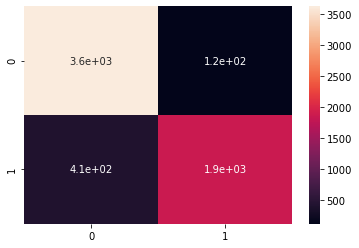

In [254]:
sns.heatmap(confusion, annot=True)

In [255]:
# Overall accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9125291569476841


In [256]:
# Classification Report
print(classification_report(y_train_pred_final.Converted, y_train_pred_final.predicted))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      3736
           1       0.94      0.82      0.88      2266

    accuracy                           0.91      6002
   macro avg       0.92      0.89      0.90      6002
weighted avg       0.91      0.91      0.91      6002



In [257]:
# Checking for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [259]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Tags_Closed by Horizzon,1.26
8,Tags_Not doing further education,1.23
12,Tags_switched off,1.17
5,Tags_Interested in full time MBA,1.10
0,Lead Source_Welingak Website,1.08
2,Asymmetrique Activity Index_03.Low,1.07
7,Tags_Lost to EINS,1.06
11,Tags_opp hangup,1.02
14,What is your current occupation_Working Profes...,0.77
1,Lead Quality_Worst,0.67


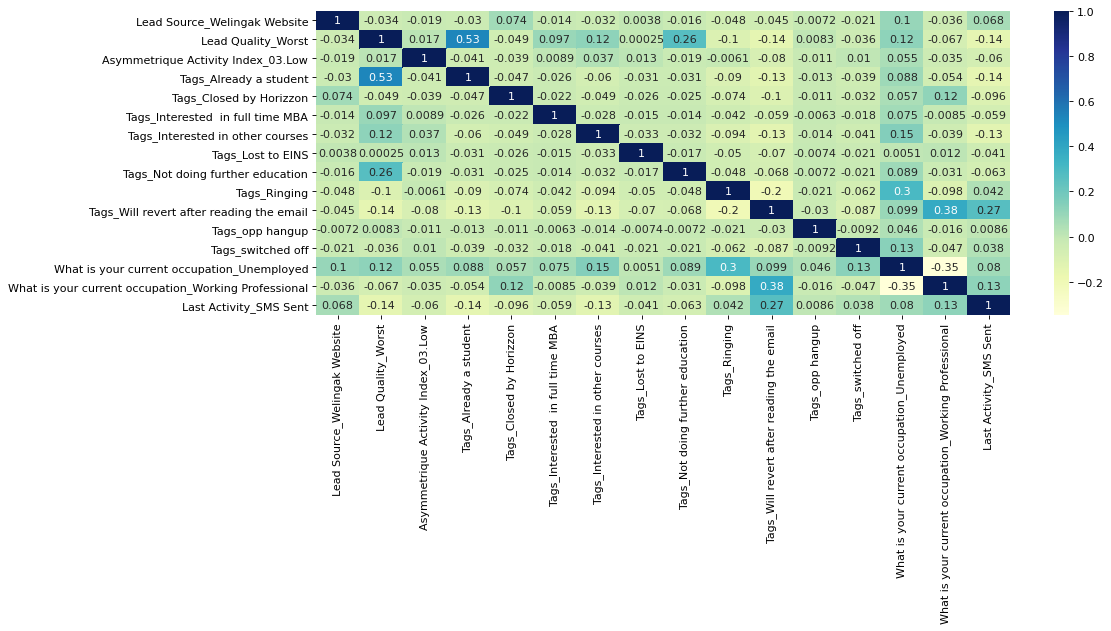

In [260]:
# Slightly alter the figure size to make it more horizontal.
plt.figure(figsize=(15,8), dpi=80, facecolor='w', edgecolor='k', frameon='True')

cor = X_train[col].corr()
sns.heatmap(cor, annot=True, cmap="YlGnBu")

plt.tight_layout()
plt.show()

##### Insights:

Our latest model have the following features:
 - <font color = blue>All variables have p-value < 0.05. </font>
 - <font color = blue>All the features have very low VIF values, meaning, there is hardly any muliticollinearity among the features. This is also evident from the heat map.</font>
 - <font color = blue>The overall accuracy of `0.9125` at a probability threshold of 0.05 is also very acceptable.</font>
 
###### So we need not drop any more variables and we can proceed with making predictions using this model only.

## Task8: Calculating other metrics for the final model

In [261]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [263]:
# Sensitivity
print("Sensitivity is:",TP / float(TP+FN),"\n")

# Specificity
print("specificity is:",TN / float(TN+FP),"\n")

Sensitivity is: 0.8195057369814651 

specificity is: 0.9689507494646681 



In [266]:
# False postive rate (predicting not converted when customer has converted)
print("False postive rate:",(FP/ float(TN+FP)), "\n")

# Positive predictive value 
print("Positive predictive value:",(TP / float(TP+FP)), "\n")

# Negative predictive value
print("Negative predictive value:",(TN / float(TN+ FN)), "\n")

False postive rate: 0.031049250535331904 

Positive predictive value: 0.941206284845413 

Negative predictive value: 0.8984859766691486 



In [ ]:
from sklearn.metrics import classification_report
classification_report(y_test,y_prediction)

###### ROC Curve

The Receiver Operator Characteristic (ROC) curve is an evaluation metric for binary classification problems. It is a probability curve that plots the TPR against FPR at various threshold values and essentially separates the ‘signal’ from the ‘noise.’ In other words, it shows the performance of a classification model at all classification thresholds. The Area Under the Curve (AUC) is the measure of the ability of a binary classifier to distinguish between classes and is used as a summary of the ROC curve.

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

The ROC AUC score tells us how efficient the model is. The higher the AUC, the better the model’s performance at distinguishing between the positive and negative classes. An AUC score of 1 means the classifier can perfectly distinguish between all the Positive and the Negative class points. An AUC value of 0 shows that the classifier predicts all Negatives as Positives and vice versa.

For in-depth understanding:
https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/

In [267]:
def draw_roc(actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr,tpr, thresholds

In [268]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate =False )

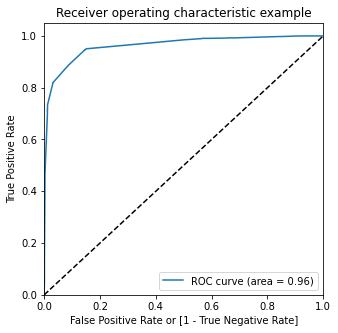

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.67665953e-04,
        2.67665953e-04, 2.67665953e-04, 5.35331906e-04, 8.02997859e-04,
        8.02997859e-04, 2.14132762e-03, 2.14132762e-03, 2.40899358e-03,
        2.40899358e-03, 2.67665953e-03, 2.67665953e-03, 2.67665953e-03,
        2.67665953e-03, 2.67665953e-03, 4.55032120e-03, 1.15096360e-02,
        1.15096360e-02, 1.15096360e-02, 1.15096360e-02, 1.15096360e-02,
        1.15096360e-02, 1.17773019e-02, 1.17773019e-02, 1.20449679e-02,
        1.20449679e-02, 3.07815846e-02, 3.07815846e-02, 3.07815846e-02,
        3.10492505e-02, 3.10492505e-02, 3.13169165e-02, 8.61884368e-02,
        8.69914347e-02, 1.45610278e-01, 1.45610278e-01, 1.45877944e-01,
        1.48019272e-01, 1.48019272e-01, 1.51498929e-01, 1.52301927e-01,
        1.53640257e-01, 1.55513919e-01, 1.56584582e-01, 1.573875

In [269]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [270]:
# Calculating the area under the curve
def auc_val(fpr,tpr):
    AreaUnderCurve = 0.
    for i in range(len(fpr)-1):
        AreaUnderCurve += (fpr[i+1]-fpr[i]) * (tpr[i+1]+tpr[i])
    AreaUnderCurve *= 0.5
    return AreaUnderCurve

In [271]:
auc = auc_val(fpr,tpr)
auc

0.9623860234430959

### Task9: Finding Optimal Cutoff Point

**Optimal cutoff probability is that prob where we get balanced sensitivity and specificity**

In [272]:
# Create columns with different probability cutoffs #

numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
    
y_train_pred_final.head(10)

,Converted,Conversion_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.064688,8529,0,1,0,0,0,0,0,0,0,0,0
1,0,0.009566,7331,0,1,0,0,0,0,0,0,0,0,0
2,1,0.762190,7688,1,1,1,1,1,1,1,1,1,0,0
3,0,0.077626,92,0,1,0,0,0,0,0,0,0,0,0
4,0,0.077626,4908,0,1,0,0,0,0,0,0,0,0,0
5,0,0.009566,451,0,1,0,0,0,0,0,0,0,0,0
6,0,0.009566,4945,0,1,0,0,0,0,0,0,0,0,0
7,1,0.994819,2844,1,1,1,1,1,1,1,1,1,1,1
8,0,0.077626,4355,0,1,0,0,0,0,0,0,0,0,0
9,0,0.000591,7251,0,1,0,0,0,0,0,0,0,0,0


In [273]:
# Calculating accuracy sensitivity and specificity for various probability cutoffs
from sklearn.metrics import confusion_matrix

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.377541  1.000000  0.000000
0.1   0.1  0.884039  0.951015  0.843415
0.2   0.2  0.888204  0.947926  0.851981
0.3   0.3  0.889037  0.946161  0.854390
0.4   0.4  0.912363  0.819506  0.968683
0.5   0.5  0.912529  0.819506  0.968951
0.6   0.6  0.912363  0.819064  0.968951
0.7   0.7  0.911863  0.817299  0.969218
0.8   0.8  0.892203  0.734334  0.987955
0.9   0.9  0.885205  0.715357  0.988223


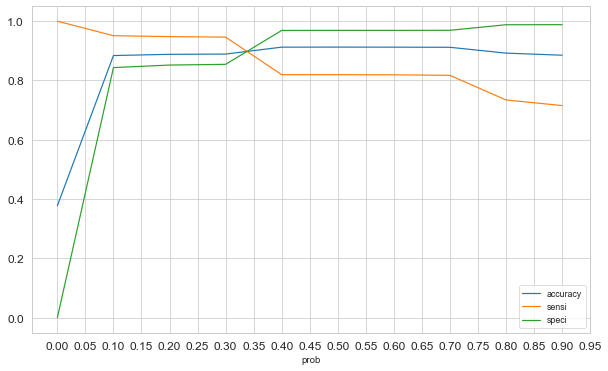

In [274]:
# Plotting accuracy, sensitivity and specificity for various probabilities

# Options are white/whitegrid/dark/ticks
sns.set_style("whitegrid") 

# Options are talk/poster
sns.set_context("paper")

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'], figsize=(10,6))

# plot x axis limits
plt.xticks(np.arange(0, 1, step=0.05), size = 12)
plt.yticks(size = 12)
plt.show()

##### Insight: "0.33" is the optimum point to take it as a cutoff probability

In [ ]:
# Precision and recall tradeoff
from sklearn.metrics import precision_recall_curve

In [ ]:
y_train_pred_final.Converted, y_train_pred_final.final_predicted

In [ ]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [ ]:
plt.figure(figsize=(8, 4), dpi=100, facecolor='w', edgecolor='k', frameon='True')
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xticks(np.arange(0, 1, step=0.05))
plt.show()

##### Insight: From the precision-recall graph above, we get the optical threshold value as close to .37. However our business requirement here is to have Lead Conversion Rate around 80

### Task10: Using 0.33 as cut-off and re-running the predictions

In [275]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.33 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.064688,8529,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.009566,7331,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.762190,7688,1,1,1,1,1,1,1,1,1,0,0,1
3,0,0.077626,92,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.077626,4908,0,1,0,0,0,0,0,0,0,0,0,0


In [276]:
# Overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9031989336887704

In [277]:
confusion1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
confusion1

array([[3411,  325],
       [ 256, 2010]], dtype=int64)

In [278]:
TP = confusion1[1,1] # true positive 
TN = confusion1[0,0] # true negatives
FP = confusion1[0,1] # false positives
FN = confusion1[1,0] # false negatives

In [279]:
# Sensitivity
print("Sensitivity is:",TP / float(TP+FN),"\n")

# Specificity
print("specificity is:",TN / float(TN+FP),"\n")

Sensitivity is: 0.8870255957634599 

specificity is: 0.9130085653104925 



In [289]:
# False postive rate (predicting not converted when customer has converted)
print("False postive rate:",(FP/ float(TN+FP)), "\n")

# Positive predictive value 
print("Positive predictive value:",(TP / float(TP+FP)), "\n")

# Negative predictive value
print("Negative predictive value:",(TN / float(TN+ FN)), "\n")

False postive rate: 0.0869914346895075 

Positive predictive value: 0.860813704496788 

Negative predictive value: 0.9301881647122989 



In [284]:
from sklearn.metrics import precision_score, recall_score

In [281]:
# Precision is TP / TP + FP
precision = confusion1[1,1]/(confusion1[0,1]+confusion1[1,1])
print("Precision is:",precision, "\n")

# Or Method2:
#precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

Precision is: 0.860813704496788 



In [283]:
# Recall is TP / TP + FN
recall = confusion1[1,1]/(confusion1[1,0]+confusion1[1,1])
recall
print("Recall is:",recall, "\n")

#or Method2:
#recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

Recall is: 0.8870255957634599 



In [290]:
# Calculating the F1 score  (F1 = 2×(Precision*Recall)/(Precision+Recall))
F1 = 2*(precision*recall)/(precision+recall)
F1

0.8737231036731146

### Task11: Making predictions on the test set

###### Using the scaler function from the train dataset to transform the test dataset

In [291]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,...,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
6190,0,0,-1.199737,-0.872062,-1.270553,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
7073,0,0,0.969969,-0.615211,1.785283,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4519,1,0,-1.199737,-0.872062,-1.270553,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
607,0,0,-1.199737,-0.872062,-1.270553,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
440,0,0,1.403911,-0.094170,0.562949,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [292]:
# Taking only the relevant columns as finalized in the training set
X_test = X_test[col]
X_test.head()

,Lead Source_Welingak Website,Lead Quality_Worst,Asymmetrique Activity Index_03.Low,Tags_Already a student,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_opp hangup,Tags_switched off,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Activity_SMS Sent
6190,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
7073,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4519,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
607,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
440,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [294]:
# Adding the constant
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,Lead Source_Welingak Website,Lead Quality_Worst,Asymmetrique Activity Index_03.Low,Tags_Already a student,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_opp hangup,Tags_switched off,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Activity_SMS Sent
6190,1.0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
7073,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4519,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
607,1.0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
440,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [295]:
# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)

In [296]:
y_test_pred[:10]

6190    0.000591
7073    0.077626
4519    0.309185
607     0.999825
440     0.077626
4247    0.077626
7431    0.008041
726     0.376039
7300    0.008041
4046    0.077626
dtype: float64

In [297]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
6190,0.000591
7073,0.077626
4519,0.309185
607,0.999825
440,0.077626


In [299]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting LeadID equal to index
y_test_df['LeadID'] = y_test_df.index
y_test_df.head()

,Converted,LeadID
6190,0,6190
7073,0,7073
4519,0,4519
607,1,607
440,0,440


In [300]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,LeadID,0
0,0,6190,0.000591
1,0,7073,0.077626
2,0,4519,0.309185
3,1,607,0.999825
4,0,440,0.077626


In [302]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={0:'Conversion_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['LeadID','Converted','Conversion_Prob'], axis=1)

print(y_pred_final.shape)
y_pred_final.head()

(2573, 3)


,Converted,LeadID,Conversion_Prob
0,0,6190,0.000591
1,0,7073,0.077626
2,0,4519,0.309185
3,1,607,0.999825
4,0,440,0.077626


In [306]:
# Using the probability threshold value 0f 0.33 on the test dataset to predict if a lead will convert
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.33 else 0)
y_pred_final.head()

,LeadID,Converted,Conversion_Prob,final_predicted
0,6190,0,0.000591,0
1,7073,0,0.077626,0
2,4519,0,0.309185,0
3,607,1,0.999825,1
4,440,0,0.077626,0


In [307]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Overall accuracy.
acc_score=metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)
acc_score

0.9055577147298873

[[1445  132]
 [ 111  885]]


<AxesSubplot:>

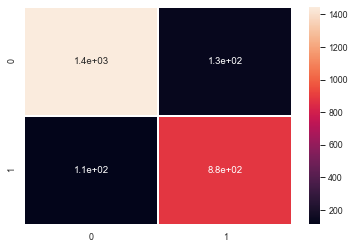

In [312]:
# Confusion Matrix 
confusion_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
print(confusion_test)

sns.heatmap(confusion_test, annot=True)

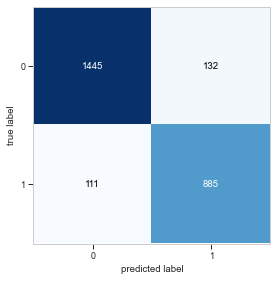

In [314]:
# Method2 for showing confusion matrix
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=confusion_test)
plt.tight_layout()
plt.show()

In [319]:
# Get classification report
print(classification_report(y_pred_final.Converted, y_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92      1577
           1       0.87      0.89      0.88       996

    accuracy                           0.91      2573
   macro avg       0.90      0.90      0.90      2573
weighted avg       0.91      0.91      0.91      2573



In [320]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [321]:
# Sensitivity
print("Sensitivity is:",TP / float(TP+FN),"\n")

# Specificity
print("specificity is:",TN / float(TN+FP),"\n")

Sensitivity is: 0.8885542168674698 

specificity is: 0.9162967660114141 



In [322]:
# False postive rate (predicting not converted when customer has converted)
print("False postive rate:",(FP/ float(TN+FP)), "\n")

# Positive predictive value 
print("Positive predictive value:",(TP / float(TP+FP)), "\n")

# Negative predictive value
print("Negative predictive value:",(TN / float(TN+ FN)), "\n")

False postive rate: 0.08370323398858592 

Positive predictive value: 0.8702064896755162 

Negative predictive value: 0.9286632390745502 



###### Cross Validation
It is a statistical method that is used to find the performance of machine learning models. It is used to protect our model against overfitting in a predictive model, particularly in those cases where the amount of data may be limited.

In cross-validation, we partitioned our dataset into a fixed number of folds (or partitions), run the analysis on each fold, and then averaged the overall error estimate.

Cross-validation techniques can be divided into two broad categories:
1. Non-Exhaustive methods
2. Exhaustive methods

To learn more: https://www.analyticsvidhya.com/blog/2021/05/importance-of-cross-validation-are-evaluation-metrics-enough/

**class sklearn.linear_model.LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)**


- solver{‘lbfgs’, ‘liblinear’, ‘newton-cg’, ‘newton-cholesky’, ‘sag’, ‘saga’}, default=’lbfgs’
Algorithm to use in the optimization problem. Default is ‘lbfgs’. 

To choose a solver, you might want to consider the following aspects:
1. For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones;
2. For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss;
3. ‘liblinear’ is limited to one-versus-rest schemes.
4. ‘newton-cholesky’ is a good choice for n_samples >> n_features, especially with one-hot encoded categorical features with rare categories. Note that it is limited to binary classification and the one-versus-rest reduction for multiclass classification.

In [323]:
# To avoid overfitting, let us calculate the Cross Validation Score to see how our model performs
from sklearn.model_selection import cross_val_score

lr = LogisticRegression(solver = 'lbfgs')
scores = cross_val_score(lr, X, y, cv=10)
scores.sort()
accuracy = scores.mean()

print(scores)
print(accuracy)

[0.8378063  0.9009324  0.90548425 0.91015169 0.91724942 0.92765461
 0.92773893 0.93006993 0.93473193 0.93582264]
0.9127642097303706


In [324]:
# Plotting the ROC Curve for Test Dataset
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr,tpr, thresholds

In [325]:
fpr, tpr, thresholds = metrics.roc_curve( y_pred_final.Converted, y_pred_final.Conversion_Prob, drop_intermediate = False )

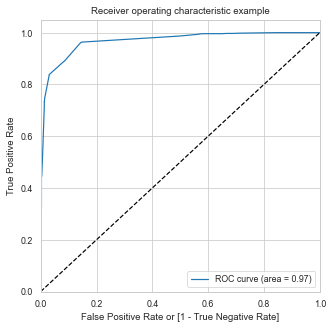

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 6.34115409e-04, 2.53646164e-03,
        2.53646164e-03, 2.53646164e-03, 2.53646164e-03, 2.53646164e-03,
        3.80469245e-03, 3.80469245e-03, 6.34115409e-03, 1.26823082e-02,
        1.26823082e-02, 1.26823082e-02, 1.26823082e-02, 1.33164236e-02,
        1.33164236e-02, 1.39505390e-02, 1.39505390e-02, 2.98034242e-02,
        2.98034242e-02, 2.98034242e-02, 8.24350032e-02, 8.37032340e-02,
        1.43310082e-01, 1.43944198e-01, 1.45846544e-01, 1.46480659e-01,
        1.47114775e-01, 1.49651237e-01, 1.50919467e-01, 1.52821814e-01,
        1.53455929e-01, 4.98414711e-01, 5.67533291e-01, 5.68167406e-01,
        5.82752061e-01, 5.85288523e-01, 6.37285986e-01, 6.48065948e-01,
        6.66455295e-01, 6.67089410e-01, 6.72162334e-01, 6.810399

In [326]:
draw_roc(y_pred_final.Converted, y_pred_final.Conversion_Prob)

In [327]:
# Calculating the Area Under the Curve
def auc_val(fpr,tpr):
    AreaUnderCurve = 0.
    for i in range(len(fpr)-1):
        AreaUnderCurve += (fpr[i+1]-fpr[i]) * (tpr[i+1]+tpr[i])
    AreaUnderCurve *= 0.5
    return AreaUnderCurve

In [328]:
auc = auc_val(fpr,tpr)
auc

0.9678947241088641

###### Insight: Since we got a value of 0.9678, our model seems to be doing well on the test dataset.

### Task12: Calculating Lead score for the entire dataset

- Lead Score = 100 * ConversionProbability
- This needs to be calculated for all the leads from the original dataset (train + test)

In [329]:
# Selecting the test dataset along with the Conversion Probability and final predicted value for 'Converted'
leads_test_pred = y_pred_final.copy()
leads_test_pred.head()

,LeadID,Converted,Conversion_Prob,final_predicted
0,6190,0,0.000591,0
1,7073,0,0.077626,0
2,4519,0,0.309185,0
3,607,1,0.999825,1
4,440,0,0.077626,0


In [330]:
# Selecting the train dataset along with the Conversion Probability and final predicted value for 'Converted'
leads_train_pred = y_train_pred_final.copy()
leads_train_pred.head()

,Converted,Conversion_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.064688,8529,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.009566,7331,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.762190,7688,1,1,1,1,1,1,1,1,1,0,0,1
3,0,0.077626,92,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.077626,4908,0,1,0,0,0,0,0,0,0,0,0,0


In [332]:
# Dropping unnecessary columns from train dataset
leads_train_pred = leads_train_pred[['LeadID','Converted','Conversion_Prob','final_predicted']]
leads_train_pred.head()

,LeadID,Converted,Conversion_Prob,final_predicted
0,8529,0,0.064688,0
1,7331,0,0.009566,0
2,7688,1,0.762190,1
3,92,0,0.077626,0
4,4908,0,0.077626,0


### Concatenating the train and the test dataset with the Conversion Probabilities

In [333]:
# Concatenating the 2 dataframes train and test along the rows with the append() function
lead_full_pred = leads_train_pred.append(leads_test_pred)
lead_full_pred.head()

,LeadID,Converted,Conversion_Prob,final_predicted
0,8529,0,0.064688,0
1,7331,0,0.009566,0
2,7688,1,0.762190,1
3,92,0,0.077626,0
4,4908,0,0.077626,0


In [334]:
# Inspecting the shape of the final dataframe and the test and train dataframes
print(leads_train_pred.shape)
print(leads_test_pred.shape)
print(lead_full_pred.shape)

(6002, 4)
(2573, 4)
(8575, 4)


In [335]:
# Ensuring the LeadIDs are unique for each lead in the finl dataframe
len(lead_full_pred['LeadID'].unique().tolist())

8575

In [336]:
# Calculating the Lead Score value
lead_full_pred['Lead_Score'] = lead_full_pred['Conversion_Prob'].apply(lambda x : round(x*100))
lead_full_pred.head()

,LeadID,Converted,Conversion_Prob,final_predicted,Lead_Score
0,8529,0,0.064688,0,6
1,7331,0,0.009566,0,1
2,7688,1,0.762190,1,76
3,92,0,0.077626,0,8
4,4908,0,0.077626,0,8


In [337]:
# Inspecing the max LeadID
lead_full_pred.LeadID.max()

9239

In [338]:
# Making the LeadID column as index
# We will later join it with the original_leads dataframe based on index
lead_full_pred = lead_full_pred.set_index('LeadID').sort_index(axis = 0, ascending = True)
lead_full_pred.head()

,Converted,Conversion_Prob,final_predicted,Lead_Score
LeadID,,,,
0,0,0.031109,0,3
1,0,0.009566,0,1
2,1,0.801308,1,80
3,0,0.009566,0,1
4,1,0.955452,1,96


In [339]:
# Slicing the Lead Number column from original_leads dataframe
original_leads = original_leads[['Lead Number']]
original_leads.head()

,Lead Number
0,660737
1,660728
2,660727
3,660719
4,660681


###### Concatenating the 2 dataframes based on index.
This is done so that Lead Score is associated to the Lead Number of each Lead. This will help in quick identification of the lead.

In [340]:
# Concatenating the 2 dataframes based on index 
leads_with_score = pd.concat([original_leads, lead_full_pred], axis=1)
leads_with_score.head(10)

,Lead Number,Converted,Conversion_Prob,final_predicted,Lead_Score
0,660737,0,0.031109,0,3
1,660728,0,0.009566,0,1
2,660727,1,0.801308,1,80
3,660719,0,0.009566,0,1
4,660681,1,0.955452,1,96
5,660680,0,0.077626,0,8
6,660673,1,0.955452,1,96
7,660664,0,0.077626,0,8
8,660624,0,0.077626,0,8
9,660616,0,0.077626,0,8


In [341]:
# Inspecting the dataframe shape
leads_with_score.shape

(8575, 5)

In [342]:
# Inspecting if the final dataframe has any null values

total = pd.DataFrame(leads_with_score.isnull().sum().sort_values(ascending=False), columns=['Total'])

percentage = pd.DataFrame(round(100*(leads_with_score.isnull().sum()/leads_with_score.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])

pd.concat([total, percentage], axis = 1)

,Total,Percentage
Lead Number,0,0.0
Converted,0,0.0
Conversion_Prob,0,0.0
final_predicted,0,0.0
Lead_Score,0,0.0


### Task13: Determining Feature Importance

Selecting the coefficients of the selected features from our final model excluding the intercept

In [343]:
pd.options.display.float_format = '{:.2f}'.format
new_params = res.params[1:]
new_params

Lead Source_Welingak Website                            3.61
Lead Quality_Worst                                     -3.18
Asymmetrique Activity Index_03.Low                     -2.34
Tags_Already a student                                 -3.45
Tags_Closed by Horizzon                                 5.44
Tags_Interested  in full time MBA                      -2.66
Tags_Interested in other courses                       -2.63
Tags_Lost to EINS                                       6.71
Tags_Not doing further education                       -3.35
Tags_Ringing                                           -3.84
Tags_Will revert after reading the email                3.87
Tags_opp hangup                                        -3.08
Tags_switched off                                      -4.73
What is your current occupation_Unemployed              1.67
What is your current occupation_Working Professional    1.89
Last Activity_SMS Sent                                  1.97
dtype: float64

In [344]:
# Getting a relative coeffient value for all the features wrt the feature with the highest coefficient
feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

Lead Source_Welingak Website                            53.85
Lead Quality_Worst                                     -47.38
Asymmetrique Activity Index_03.Low                     -34.87
Tags_Already a student                                 -51.40
Tags_Closed by Horizzon                                 81.12
Tags_Interested  in full time MBA                      -39.59
Tags_Interested in other courses                       -39.26
Tags_Lost to EINS                                      100.00
Tags_Not doing further education                       -49.88
Tags_Ringing                                           -57.17
Tags_Will revert after reading the email                57.67
Tags_opp hangup                                        -45.88
Tags_switched off                                      -70.45
What is your current occupation_Unemployed              24.90
What is your current occupation_Working Professional    28.23
Last Activity_SMS Sent                                  29.34
dtype: f

In [345]:
# Sorting the feature variables based on their relative coefficient values
sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx

Lead Source_Welingak Website                            12
Lead Quality_Worst                                       9
Asymmetrique Activity Index_03.Low                       3
Tags_Already a student                                   8
Tags_Closed by Horizzon                                  1
Tags_Interested  in full time MBA                       11
Tags_Interested in other courses                         5
Tags_Lost to EINS                                        6
Tags_Not doing further education                         2
Tags_Ringing                                            13
Tags_Will revert after reading the email                14
Tags_opp hangup                                         15
Tags_switched off                                        0
What is your current occupation_Unemployed              10
What is your current occupation_Working Professional     4
Last Activity_SMS Sent                                   7
dtype: int64

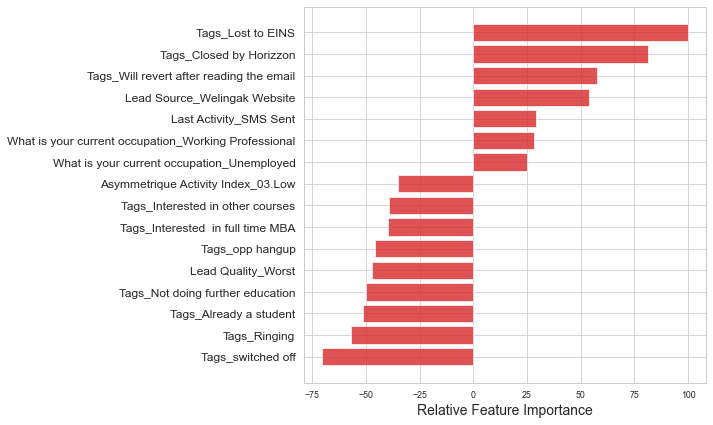

In [346]:
# Plot showing the feature variables based on their relative coefficient values
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(10,6))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center', color = 'tab:red',alpha=0.8)
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train[col].columns)[sorted_idx], fontsize=12)
featax.set_xlabel('Relative Feature Importance', fontsize=14)

plt.tight_layout()   
plt.show()

In [347]:
# Selecting Top 3 features which contribute most towards the probability of a lead getting converted
pd.DataFrame(feature_importance).reset_index().sort_values(by=0,ascending=False).head(3)

,index,0
7,Tags_Lost to EINS,100.00
4,Tags_Closed by Horizzon,81.12
10,Tags_Will revert after reading the email,57.67


### Task14: Conclusion

###### After trying several models, we finally chose a model with the following characteristics:

 - All variables have p-value < `0.05`.
 - All the features have very low VIF values, meaning, there is `hardly any muliticollinearity` among the features. This is also evident from the heat map.
 - The overall accuracy of `0.9056` at a probability threshold of 0.33 on the test dataset is also very acceptable.
    
###### The conversion probability of a lead increases with increase in values of the following features in descending order:

|Features with Positive Coefficient Values|
|-------------|
|Tags_Lost to EINS|
|Tags_Closed by Horizzon|
|Tags_Will revert after reading the email|
|Lead Source_Welingak Website|
|Last Activity_SMS Sent|
|What is your current occupation_Working Professional|
|What is your current occupation_Unemployed|

#### The conversion probability of a lead increases with decrease in values of the following features in descending order:

|Features with Negative Coefficient Values|
|----------|
|Tags_switched off|
|Tags_Ringing|
|Tags_Already a student|
|Tags_Not doing further education|
|Lead Quality_Worst|
|Tags_opp hangup|
|Tags_Interested  in full time MBA|
|Tags_Interested in other courses|
|Asymmetrique Activity Index_03.Low|


Another point to note here is that, depending on the business requirement, we can increase or decrease the probability threshold value with in turn will decrease or increase the Sensitivity and increase or decrease the Specificity of the model.

High Sensitivity will ensure that almost all leads who are likely to Convert are correctly predicted where as high Specificity will ensure that leads that are on the brink of the probability of getting Converted or not are not selected.